In [34]:

import pickle
import librosa
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt


import os

import IPython.display as ipd
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import plotly.graph_objs as go
import plotly.offline as py
import plotly.tools as tls
import seaborn as sns

## Sklearn
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder


In [4]:
import os
countofangry = 0
countofhappy = 0
countofneutral = 0
countofsad = 0
angry = "emotion_dataset/Angry/"
happy = "emotion_dataset/Happy/"
neutral = "emotion_dataset/Neutral/"
sad = "emotion_dataset/Sad/"
for path in os.listdir(angry):
    if os.path.isfile(os.path.join(angry, path)):
        countofangry += 1
print(countofangry)
for path in os.listdir(sad):
    if os.path.isfile(os.path.join(sad, path)):
        countofsad += 1
print(countofsad)
for path in os.listdir(neutral):
    if os.path.isfile(os.path.join(neutral, path)):
        countofneutral += 1
print(countofneutral)
for path in os.listdir(happy):
    if os.path.isfile(os.path.join(happy, path)):
        countofhappy += 1
print(countofhappy)


100
100
100
100


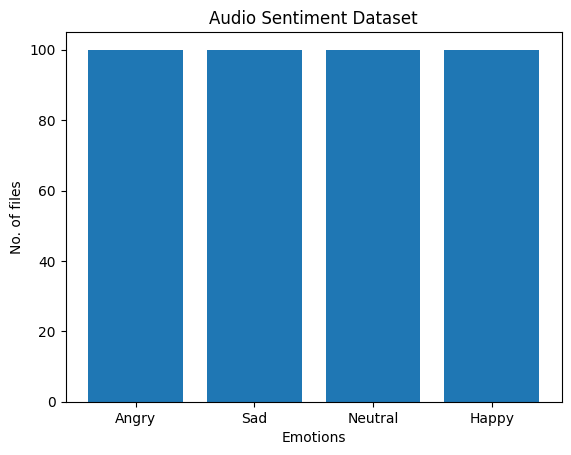

In [5]:
yAxis=[countofangry,countofsad,countofneutral,countofhappy] 
xAxis=["Angry","Sad","Neutral","Happy"]
plt.bar(xAxis,yAxis)
plt.title('Audio Sentiment Dataset')
plt.xlabel('Emotions')
plt.ylabel('No. of files')
plt.show()

In [11]:
## Neytral Sound
filename='emotion_dataset/Neutral/SF9_F1_N01.wav'
ipd.Audio(filename)

In [12]:
## Sad Sound
filename='emotion_dataset/Sad/SF10_F1_S01.wav'
ipd.Audio(filename)

In [13]:
## Happy Sound
filename='emotion_dataset/Happy/SF1_F2_H02.wav'
ipd.Audio(filename)

In [14]:
## Angry Sound
filename='emotion_dataset/Angry/SM1_F1_A01.wav'
ipd.Audio(filename)

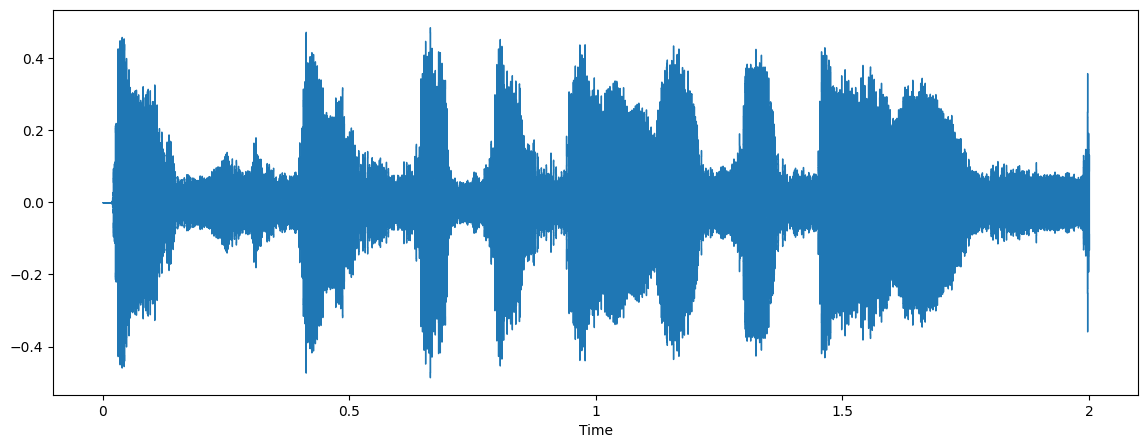

In [15]:
plt.figure(figsize=(14,5))
data,sample_rate=librosa.load(filename)
librosa.display.waveshow(data,sr=sample_rate)



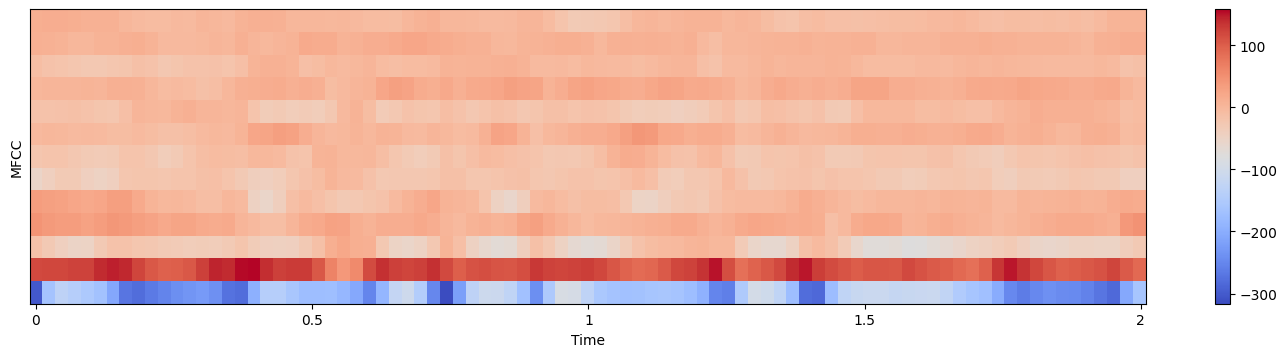

In [16]:

# plot the mfcc
mfcc = librosa.feature.mfcc(y=data, sr=sample_rate, n_mfcc=13)
plt.figure(figsize=(18, 13))
plt.subplot(3,1,1)
librosa.display.specshow(mfcc, x_axis='time')
plt.ylabel('MFCC')
plt.colorbar()


In [29]:
def add_noise(data,random=False,rate=0.035,threshold=0.075):
    if random:
        rate=np.random.random()*threshold
    noise=rate*np.random.uniform()*np.amax(data)
    augmented_data=data+noise*np.random.normal(size=data.shape[0])
    return augmented_data

def shifting(data,rate=1000):
    augmented_data=int(np.random.uniform(low=-5,high=5)*rate)
    augmented_data=np.roll(data,augmented_data)
    return augmented_data

def pitching(data,sr,pitch_factor=0.7,random=False):
    if random:
        pitch_factor=np.random.random() * pitch_factor
    return librosa.effects.pitch_shift(y=data,sr=sr,n_steps=pitch_factor)

def streching(data,rate=0.8):
    return librosa.effects.time_stretch(y=data,rate=rate)
    

In [18]:
file_paths=[]
emotions_label=[]

Train_Data = ['emotion_dataset/Angry/', 
              'emotion_dataset/Happy/', 
              'emotion_dataset/Neutral/', 
              'emotion_dataset/Sad/']
for path in Train_Data:
    counter =0
    if counter <1:
        for file in os.listdir(path):

           # print('*', end='')
            file_path = path+file
            file_paths.append(file_path)        
            emotions_label.append(file_path.split('/')[1])
            counter =2
#         
        
    print('\nFeatures Extract From',path,'Completed!')
# print(X)



Features Extract From emotion_dataset/Angry/ Completed!

Features Extract From emotion_dataset/Happy/ Completed!

Features Extract From emotion_dataset/Neutral/ Completed!

Features Extract From emotion_dataset/Sad/ Completed!


In [23]:
df = pd.DataFrame({'Emotion': emotions_label, 'File_Path': file_paths})


In [24]:
df       

,Emotion,File_Path
0,Angry,emotion_dataset/Angry/SM1_F10_A010.wav
1,Angry,emotion_dataset/Angry/SM1_F11_A011.wav
2,Angry,emotion_dataset/Angry/SM1_F12_A012.wav
3,Angry,emotion_dataset/Angry/SM1_F13_A013.wav
4,Angry,emotion_dataset/Angry/SM1_F14_A014.wav
...,...,...
395,Sad,emotion_dataset/Sad/SM27_F4_S096.wav
396,Sad,emotion_dataset/Sad/SM6_F1_S097.wav
397,Sad,emotion_dataset/Sad/SM6_F2_S098.wav
398,Sad,emotion_dataset/Sad/SM6_F3_S099.wav


In [30]:

import soundfile as sf


folders = ['happy', 'sad', 'angry', 'neutral']
output_dir = 'augmented_audios'

os.makedirs(output_dir, exist_ok=True)


def augment_and_save_audio(audio_path, emotion):
    data, sr = librosa.load(audio_path, sr=None)
    
    # Apply augmentation techniques
    augmented_data = add_noise(data)
    augmented_data = shifting(augmented_data)
    augmented_data = pitching(augmented_data, sr)
    augmented_data = streching(augmented_data)
    
    output_folder = os.path.join(output_dir, emotion)
    os.makedirs(output_folder, exist_ok=True)
    output_path = os.path.join(output_folder, os.path.basename(audio_path))
    sf.write(output_path, augmented_data, sr)


for index, row in df.iterrows():
    emotion = row['Emotion']
    audio_path = row['File_Path']
    augment_and_save_audio(audio_path, emotion)

print("Augmentation completed and augmented audios saved in folders.")


Augmentation completed and augmented audios saved in folders.


In [31]:
## Angry Sound
filename='augmented_audios/Angry/SM1_F1_A01.wav'
ipd.Audio(filename)

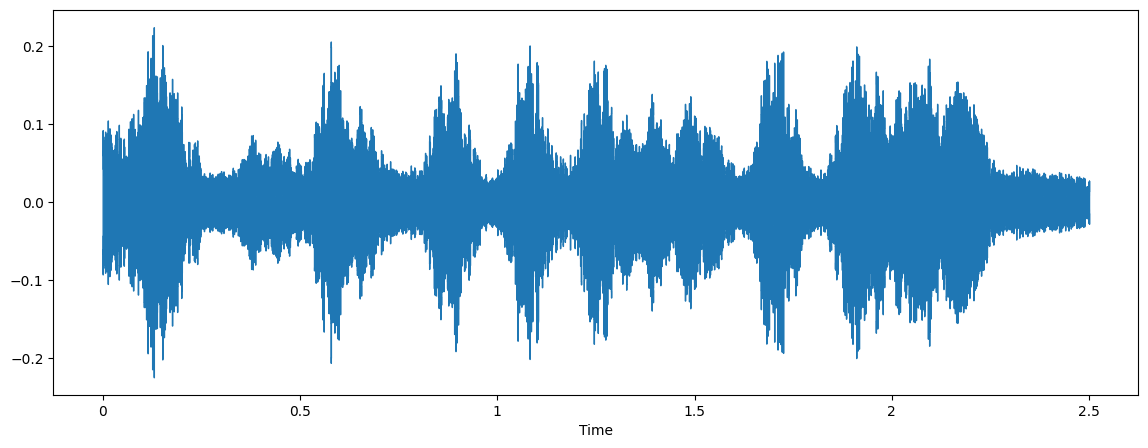

In [32]:
plt.figure(figsize=(14,5))
data,sample_rate=librosa.load(filename)
librosa.display.waveshow(data,sr=sample_rate)

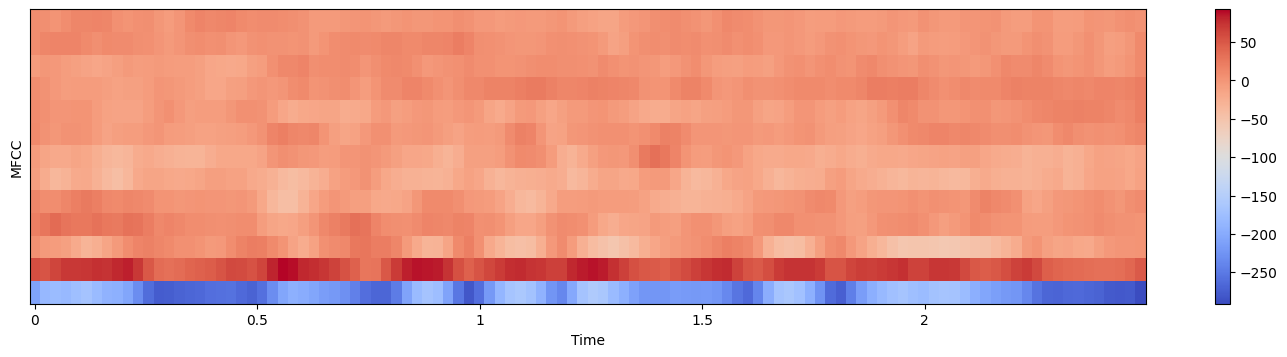

In [33]:
mfcc = librosa.feature.mfcc(y=data, sr=sample_rate, n_mfcc=13)
plt.figure(figsize=(18, 13))
plt.subplot(3,1,1)
librosa.display.specshow(mfcc, x_axis='time')
plt.ylabel('MFCC')
plt.colorbar()
